## Exercise 1: 

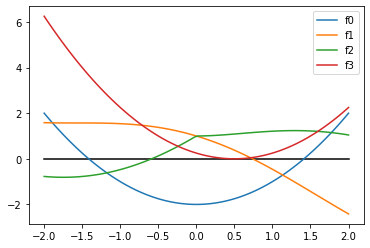

In [238]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.misc as scpy

# Define a set of functions

def f0(x):
    return x*x - 2, 2*x

def f1(x):
    return np.cos(x) - x, -np.sin(x) - 1

def f2(x):
    # Note that this is a piecewise function, effectively
    return np.exp(-np.abs(x)) + np.sin(x), np.exp(-np.abs(x))*(-np.sign(x)) + np.cos(x)

def f3(x):
    return x*x - x + 0.25, 2*x - 1

# Make a list of these functions so that
# it is easy to iterate over

tests = (f0, f1, f2, f3)

# Define a range over which to plot these functions
x = np.linspace(-2,2,100)
plt.plot(x, 0*x, color='k')

# Iterate over the functions defined above
for f in tests:
    plt.plot(x, f(x)[0], label=f.__name__)
plt.legend(loc='upper right');

### 1. Which of these functions have at least one root?

In [86]:
#### Finds number of roots for each function
def confirmroot(functions, rge):
    
    min=int(rge[0]*10)
    max=int(rge[1]*10)
    rootarr=[]

    for f in functions:
        count=0
        if f(min//10)[0]>0:
            sign=1
        else:
            sign=-1
    
        for x in range(int(min),int(max),1):
            if f(x/10)[0]==0:
                count+=1
            elif f(x/10)[0]>=0:
                newsign=1
            else:
                newsign=-1
            if sign != newsign:
                count+=1
            sign=newsign    
        rootarr.append(count!=0)
    
    return rootarr

print(confirmroot(tests,[-2,2]))
        
    
    

[True, True, True, True]


All of these functions have at least one root.

### 2. Which have more than one root?

In [80]:
def numroot(functions, rge):
    
    min=int(rge[0])
    max=int(rge[1])
    rootarr=[]
    
    for f in functions:
        count=0
        
        for j in np.arange(min,max):
            p=f(j)[0]*f(j+1)[0]
            if p==0 or p<0:
                count+=1
                
        rootarr.append(count)
    return rootarr
            
print(numroot(tests,[-2,2]))

[2, 1, 1, 0]


One limiting factor of this function is that you have to iterate of the whole range. In this small range it is not computationally intensive, but other cases it could become very inefficient. Also, function f3 this method is unable to identify the root since it is positive everywhere except at the root. 

### 3. Define a function that has more than two roots in the specified range from  −2≤𝑥≤2
 

In [45]:
def f4(x):
    return (x-1)*(x-2)*x, 3*x^2-6*x+2

# Exercise 2

Questions for Exercise 2:

1. Write a `hasroot` method to determine if a user-defined analytic function has a root in the specified interval
1. Write a new `bisection` function that uses the `hasroot` method overcomes the shortcomings mentioned above by
   1. taking a user defined function as an argument
   1. returns a list of the iterations of the method as a *history* (i.e. returns a list of the values of the root(s) found
   1. Perform a truly *iterative* method by calling *itself* in the case that additional iterations are required
1. Plot the value(s) of the root(s) found as a function of iteration number.



In [46]:
def bisection(a, b, tol, max_it):
    i = 1
    fa = f(a)
    while i <= max_it:
        p = (a + b) / 2.0
        fp = f(p)
        if fp == 0 or (b - a) < tol:
            p_out = p
            print("Number of iterations = " + str(i))
            return(p)
        i += 1
        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p
    print('max num iteration exceeded')
    return(-999)

### 1. hasroot method

In [88]:
#This function returns a boolean indicating whether the inputted function has a root, the number of roots identified
# and the intervals that contain each root
def hasroot(f, interval):

    min=interval[0]
    max=interval[1]
    rootinterval=[]
    
    hasroot=confirmroot(f,interval)

    if not hasroot:
        return False, 0, 0
    
    count=0

    f=f[0]
    for j in np.arange(min,max):
        p=f(j)[0]*f(j+1)[0]
        if p==0 or p<0:
            count+=1
            rootinterval.append([j,j+1])
                
    numroot=count 
    
    return hasroot, numroot, rootinterval

hasroot([f1],[-2,2])

([True], 1, [[0, 1]])

### 2.  new bisection method

In [289]:
#This bisection method takes in a function and an interval and will find all the roots within that interval
def bisection_new(function, a,b,tol, max_it, verbose=True):
    
    root, numroot, rootinterval=hasroot([function], [a,b])
    
    rootarr=[]
    
    if not root:
        return [0]
    for j in range(numroot):
        a=rootinterval[j][0]
        b=rootinterval[j][1]
        fa = function(a)[0]
        
        
        for i in range(max_it):
            p=(a+b)/2.0
            fp = function(p)[0]
            if fp==0 or (b-a)<tol:
                if verbose:
                    print("Number of iterations = " + str(i))
                rootarr.append(p)
                break 
            
            if fa * fp > 0:
                a = p
                fa = fp
            else:
                b = p
        else:
            rootarr.append(p)
            if verbose: 
                print('Iterations maxed out')
        
    
    return rootarr


bisection_new(f0, -2,2, 10**-15, 10000)

Number of iterations = 50
Number of iterations = 50


[-1.4142135623730954, 1.4142135623730954]

In [119]:
#This bisection method is recursive
#<ust pass in an interval with only one root

def bisection_new_recursive(function, a,b,tol, max_it, numiter, checkroot, verbose=True):
    
    root, numroot, rootinterval=hasroot([function], [a,b])
    if not root:
        return [0]
        
    fa = function(a)[0]
        
        
    p=(a+b)/2.0
    fp = function(p)[0]
        
    if numiter>max_it:
        if verbose: 
            print('Iterations maxed out')
        return p
        
    elif fp==0 or (b-a)<tol:
        if verbose:
            print("Number of iterations = " + str(numiter))
        return p
  
    elif fa * fp > 0:
        a = p
        return bisection_new_recursive(function,a,b,tol,max_it,numiter+1,checkroot,verbose=verbose)
    else:
        b = p
        return bisection_new_recursive(function,a,b,tol,max_it,numiter+1,checkroot,verbose=verbose)
        
    
    return p


root= bisection_new_recursive(f0, 0,2, 10**-15, 900,0,True, True)
print(root)

root= bisection_new_recursive(f1, 0,2, 10**-15, 900,0,True, True)
print(root)

Number of iterations = 51
1.4142135623730954
Number of iterations = 51
0.7390851332151605


In [283]:
#This bisection method is recursive and returns the history of calculating the root
#must pass in an interval with only one root

def bisection_new_recursive(function, a,b,tol, max_it, numiter, checkroot, rootarr, verbose=True):
    
    root, numroot, rootinterval=hasroot([function], [a,b])
    if not root:
        return [0]
        
    fa = function(a)[0]
        
        
    p=(a+b)/2.0
    fp = function(p)[0]
        
    if numiter>=max_it:
        if verbose: 
            print('Iterations maxed out')
            rootarr.append(p)
        return rootarr
        
    elif fp==0 or (b-a)<tol:
        if verbose:
            print("Number of iterations = " + str(numiter))
        rootarr.append(p)
        return rootarr
  
    elif fa * fp > 0:
        a = p
        rootarr.append(p)
        rootarr=bisection_new_recursive(function,a,b,tol,max_it,numiter+1,checkroot, rootarr, verbose=verbose)
    else:
        b = p
        rootarr.append(p)
        rootarr=bisection_new_recursive(function,a,b,tol,max_it,numiter+1,checkroot, rootarr, verbose=verbose)
        
    
    return rootarr


rootarr=[]
root= bisection_new_recursive(f0, 0,2, 10**-15, 1000,0,True,rootarr, True)
print(root)


rootarr=[]
root= bisection_new_recursive(f1, 0,2, 10**-15, 1000,0,True,rootarr, True)
print(root)


Number of iterations = 51
[1.0, 1.5, 1.25, 1.375, 1.4375, 1.40625, 1.421875, 1.4140625, 1.41796875, 1.416015625, 1.4150390625, 1.41455078125, 1.414306640625, 1.4141845703125, 1.41424560546875, 1.414215087890625, 1.4141998291015625, 1.4142074584960938, 1.4142112731933594, 1.4142131805419922, 1.4142141342163086, 1.4142136573791504, 1.4142134189605713, 1.4142135381698608, 1.4142135977745056, 1.4142135679721832, 1.414213553071022, 1.4142135605216026, 1.414213564246893, 1.4142135623842478, 1.4142135614529252, 1.4142135619185865, 1.4142135621514171, 1.4142135622678325, 1.4142135623260401, 1.414213562355144, 1.4142135623696959, 1.4142135623769718, 1.4142135623733338, 1.4142135623715149, 1.4142135623724243, 1.414213562372879, 1.4142135623731065, 1.4142135623729928, 1.4142135623730496, 1.414213562373078, 1.4142135623730923, 1.4142135623730994, 1.4142135623730958, 1.414213562373094, 1.414213562373095, 1.4142135623730954]
Number of iterations = 51
[1.0, 0.5, 0.75, 0.625, 0.6875, 0.71875, 0.734375

### 3. Plot value of root vs iteration number 

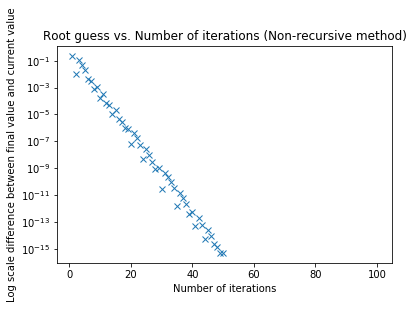

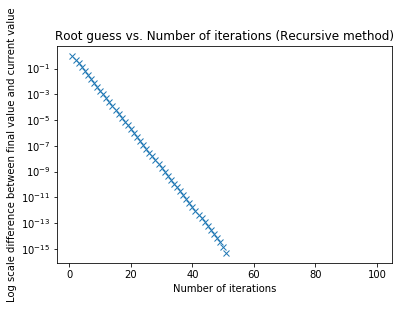

In [290]:
#bisection method implemented without recursion used
iteration=np.linspace(1,100,100, dtype=int)

root=[]
for i in iteration:
    rootarr=bisection_new(f1, -2, 2, 10**-15, i, verbose=False)
    root.append(rootarr)

root=[y for x in root for y in x]

root=np.array(root)
plt.plot(iteration,np.abs(root-root[-1]),'x')
plt.yscale('log')
plt.title('Root guess vs. Number of iterations (Non-recursive method)')
plt.xlabel('Number of iterations')
plt.ylabel('Log scale difference between final value and current value')
plt.show()


#recursive function used
iteration=np.linspace(1,100,100, dtype=int)

root=[]
emptyarr=[]
for i in iteration:
    rootarr=bisection_new_recursive(f1, -2, 0, 10**-15, i, 0, True, emptyarr, verbose=False)
    root.append(rootarr[-1])


root=np.array(root)
plt.plot(iteration,np.abs(root-root[-1]),'x')
plt.yscale('log')
plt.title('Root guess vs. Number of iterations (Recursive method)')
plt.xlabel('Number of iterations')
plt.ylabel('Log scale difference between final value and current value')
plt.show()

## Exercise 3: perform tests of your bisection function 

Test the accuracy of your `bisection` function by comparing your implementation to the native calculations in `numpy`.

For example:

~~~~    
np.sqrt(2) - bisection(f0, 0, 2)
~~~~

Questions for exercise 3:

1. What is the accuracy of the `bisection` function for various user-defined input functions
1. How many iterations are required for various functions?

### 1. What is the accuracy of bisection function for various user-defined input functions?

The highest accuracy we are able to achieve is a tolerance of 10^(-15). 10^(-16) maxes out the float storage capacity so we are not able to take the difference of numbers with more than 10^(-15) decimals. 

For x^2=2, we know the root will be sqrt(2). When compared to np.sqrt(2), we see that our bisection_new root is accurate up to 10^(-16), which is less than our tolerance. 

In [292]:

def f5(x):
    return np.sin(x), -np.cos(x)

#f0: x^2=2 between 0 and 2
print('x^2=2 between 0 and 2')
n=bisection_new(f0, 0, 2, 10**-15, 1000, verbose=True)[0]
diff=np.sqrt(2) - n
print('The accuracy of my bisection_new is ', diff )
print('Root found was:', n)
print('Numpy np.sqrt(2)', np.sqrt(2))

#f1: sin(x) between 3 and 4
print('sin(x)=0')
n=bisection_new(f5, 3, 4, 10**-16, 10**5, verbose=True)[0]
diff=np.pi - n
print('The accuracy of my bisection_new is ', diff )
print('Root found was:', n)
print('Numpy pi:', np.pi)

print('\n\n')

#with recursive function

#f0: x^2=2 between 0 and 2
print('x^2=2 between 0 and 2')
rootarr=[]
n= bisection_new_recursive(f0, 0,2, 10**-15, 1000,0,True,rootarr, True)
diff=np.sqrt(2) - n[-1]
print('The accuracy of my bisection_new_recursive is ', diff )
print('Root found was:', n[-1])
print('Numpy np.sqrt(2)', np.sqrt(2))
print ('\n')

#f1: sin(x) between 3 and 4
print('sin(x)=0')
rootarr=[]
n=bisection_new_recursive(f5, 3, 4, 10**-15, 1000,0, True, rootarr, True)
diff=np.pi - n[-1]
print('The accuracy of my bisection_new_recursive is ', diff )
print('Root found was: ', n[-1])
print('Numpy pi:', np.pi)
print('With 10^-14 tolerance:')
n=bisection_new_recursive(f5, 3, 4, 10**-14, 1000,0, True, rootarr, True)
diff=np.pi - n[-1]
print('The accuracy of my bisection_new_recursive is ', diff )
print('Root found was: ', n[-1])
print('Numpy pi:', np.pi)

x^2=2 between 0 and 2
Number of iterations = 50
The accuracy of my bisection_new is  -2.220446049250313e-16
Root found was: 1.4142135623730954
Numpy np.sqrt(2) 1.4142135623730951
sin(x)=0
Iterations maxed out
The accuracy of my bisection_new is  0.0
Root found was: 3.141592653589793
Numpy pi: 3.141592653589793



x^2=2 between 0 and 2
Number of iterations = 51
The accuracy of my bisection_new_recursive is  -2.220446049250313e-16
Root found was: 1.4142135623730954
Numpy np.sqrt(2) 1.4142135623730951


sin(x)=0
Number of iterations = 50
The accuracy of my bisection_new_recursive is  -4.440892098500626e-16
Root found was:  3.1415926535897936
Numpy pi: 3.141592653589793
With 10^-14 tolerance:
Number of iterations = 47
The accuracy of my bisection_new_recursive is  0.0
Root found was:  3.141592653589793
Numpy pi: 3.141592653589793


The root we find when our tolerance is 10^-15 has one more digit than the numpy.pi value. However, the extra 6 at the end does not make our root more accurate since the true next number of pi is 2 (pi=3.1415926535897932). If we make our tolerance 10^-14, we find the same number as np.pi. 

## Exercise 4: compute and plot errors <a class="anchor" name="ex4"></a>

In this exercise, you should graphically represent the error between your approximation and the "true" answer.

Questions for exercise 4:

1. Compute errors for each of your functions as a function of the iteration number
1. Plot the errors as a function of that iteration number

Suggestions:

1. Use the history list that you've built into the `bisection` function
1. Plot this as a `semilogy` plot of error vs. iteration number

### 1. Compute errors for each of your functions as a function of the iteration number

In [297]:
#f0: x^2=2 between 0 and 2
print('x^2=2 between 0 and 2')
rootarr=[]
n0= bisection_new_recursive(f0, 0,2, 10**-15, 1000,0,True,rootarr, True)
error0=np.abs(np.sqrt(2) - n0)
print('Error at each iteration:',error0)

print('\n')
#f5: sin(x) between 3 and 4
print('sin(x)=0')
rootarr=[]
n1=bisection_new_recursive(f5, 3, 4, 10**-15, 1000,0, True, rootarr, True)
n1=np.array(n1)
error1=np.abs(np.pi - n1)
print('Error at each iteration:',error1)


x^2=2 between 0 and 2
Number of iterations = 51
Error at each iteration: [4.14213562e-01 8.57864376e-02 1.64213562e-01 3.92135624e-02
 2.32864376e-02 7.96356237e-03 7.66143763e-03 1.51062373e-04
 3.75518763e-03 1.80206263e-03 8.25500127e-04 3.37218877e-04
 9.30782519e-05 2.89920606e-05 3.20430957e-05 1.52551753e-06
 1.37332715e-05 6.10387700e-06 2.28917974e-06 3.81831103e-07
 5.71843213e-07 9.50060552e-08 1.43412524e-07 2.42032343e-08
 3.54014105e-08 5.59908808e-09 9.30207311e-09 1.85149251e-09
 1.87379778e-09 1.11526344e-11 9.20169940e-10 4.54508653e-10
 2.21678009e-10 1.05262687e-10 4.70550265e-11 1.79511961e-11
 3.39928086e-12 3.87667676e-12 2.38697950e-13 1.58029145e-12
 6.70796751e-13 2.16049401e-13 1.13242749e-14 1.02362563e-13
 4.55191440e-14 1.70974346e-14 2.88657986e-15 4.21884749e-15
 6.66133815e-16 1.11022302e-15 2.22044605e-16 2.22044605e-16]


sin(x)=0
Number of iterations = 50
Error at each iteration: [3.58407346e-01 1.08407346e-01 1.65926536e-02 4.59073464e-02
 1.4657346

We see that the fourth iteration before the end when searching for the root of sin(x)=0 is 0. As noted above, our function finds the same value as np.pi when our tolerance is set to 10^-14, but adds another digit when the tolerance is set to 10^-15 and thus has an error from the np.pi value. 

### 2. Plot the errors as a function of that iteration number

Text(0, 0.5, 'Error (log scale)')

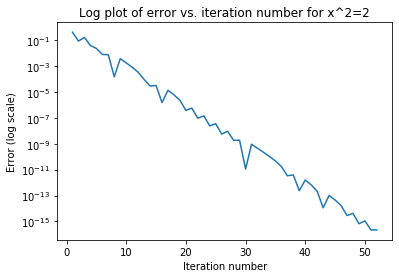

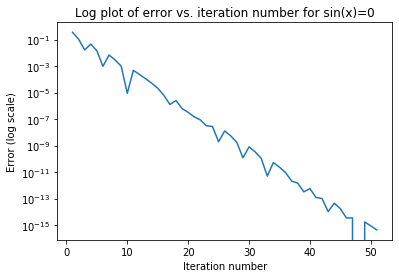

In [296]:
x=np.linspace(1,len(n0),len(n0))
plt.semilogy(x,error0)
plt.title('Log plot of error vs. iteration number for x^2=2')
plt.xlabel('Iteration number')
plt.ylabel('Error (log scale)')

plt.figure()
x=np.linspace(1,len(n1),len(n1))
plt.semilogy(x,error1)
plt.title('Log plot of error vs. iteration number for sin(x)=0')
plt.xlabel('Iteration number')
plt.ylabel('Error (log scale)')


### Exercise 5: write a function that implements Newton's method <a class="anchor" name="ex5"></a>

We discussed an example in lecture (in the Examples folder in GitHub: https://github.com/UChicagoPhysics/PHYS250/tree/master/Examples).

However, this function had a few shortcomings or shortcuts that you should now fix or change.

Questions for exercise 5:

1. Instead of using a built-in library for computing the derivative of the function `f(x)`, `f'(x)`, I want you to compute it yourself.
   * Write your own `derivative` function that numerically calculates a derivative
   * There's a clever approach to this that can be used whereby you create a 2D array of `y` values of the function (the rows) vs. `x` values at which the function is evaluated (the columns) and then just calculate the linear approximation of the function between even point using the `np.roll` function that you may have also used for the Ising model.
1. Place a tolerance on the computation of the derivative of this function in addition to the convergence of the method itself.
1. Protect against division by zero for the first derivative of the function in question

### 1. Instead of using a built-in library for computing the derivative of the function f(x), f'(x), I want you to compute it yourself.


In [323]:
from scipy.misc import derivative

def my_derivative(function, x, tol=10**-10):
    if tol==0:
        print('Invalid tolerance')
        return
    h=np.sqrt(tol)
    slope=(function(x+h)[0]-function(x-h)[0])/(2*h)
    
    return slope


print('My derivative function for x^2-2 at x=2: ', my_derivative(f0,2,0.1))
print('My derivative function for cos(x)-x at x=0: ',my_derivative(f1,0,1e-15))


def f6(x):
    return x*x -2

def f7(x):
    return np.cos(x) - x

print('Scipy derivative function for x^2-2 at x=2: ', derivative(f6, 2.0, dx=1e-15))

print('Scipy derivative function for cos(x)-x at x=0: ',derivative(f7,0,dx=1e-15))


My derivative function for x^2-2 at x=2:  4.0
My derivative function for cos(x)-x at x=0:  -0.9999999988079767
Scipy derivative function for x^2-2 at x=2:  3.996802888650563
Scipy derivative function for cos(x)-x at x=0:  -1.0547118733938987


## Exercise 6

Questions for exercise 6:

* Did we solve all of these equations?
* How can the iteration break down?
* Does choosing a different initial guess lead to different solutions?
* How is this convergence test different from the one we used for bisection?
* Is the convergence rate similar for all test equations?

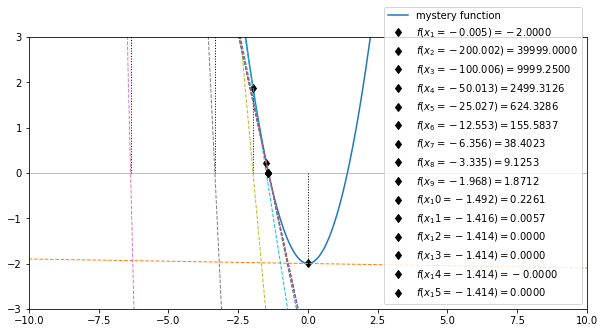

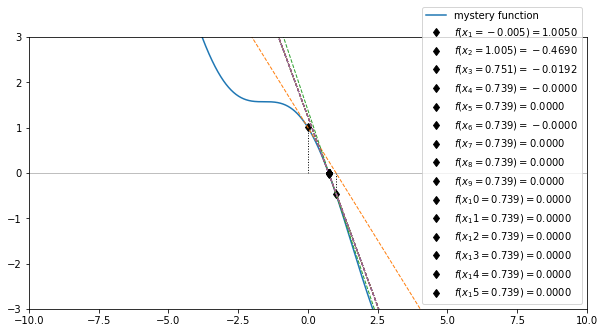

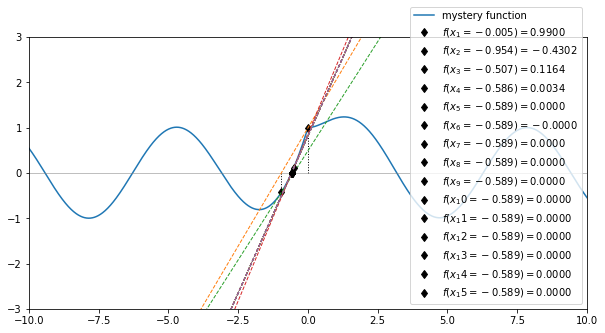

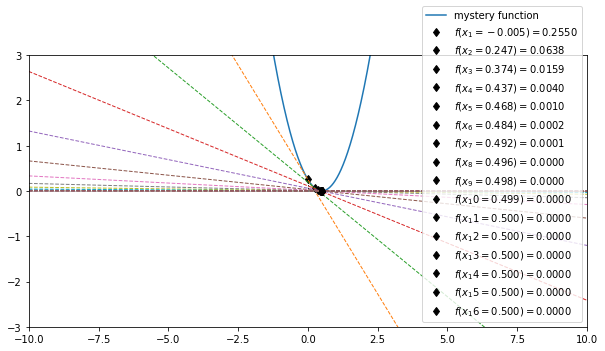

In [352]:
#Implementing my_derivative in Newton's method
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
%matplotlib inline

def f_line(f, x, x_n):
    slope = my_derivative(f, x_n, 0.01)
    if slope == 0:
        return 0,0
    x_nn  = x_n - f(x_n)[0] / slope 
    return slope * (x - x_n) + f(x_n)[0], x_nn

def runNewton(f, startingpoint, order):

    x = np.linspace(-20, 30, 5000)
    
    x_n = startingpoint
    ax.clear()
    ax.plot(x, f(x)[0], label='mystery function')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        flabel=f(x_n)[0]
        ax.plot(x_n, f(x_n)[0], 'kd',label=r'$f(x_{}={:.3f})={:.4f}$'.format(i + 1, x_n, flabel))
        ax.vlines(x_n, 0, f(x_n)[0], color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)
        if np.any(f_l)==0:
            print('Unable to converge. Slope is 0.')
            break

        
    #plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
    #         yticks=[-1, 0, 1], yticklabels=['-1', '0', '+1'])
    ax.set_ylim(-3, 3)
    ax.set_xlim(-10, 10)
    ax.legend(loc="lower right")
    plt.show()
    
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f0,-0.005,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f1,-0.005,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f2,-0.005,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f3,-0.005,16)

* With the Newton method, we were able to find the roots for every function. See above. 

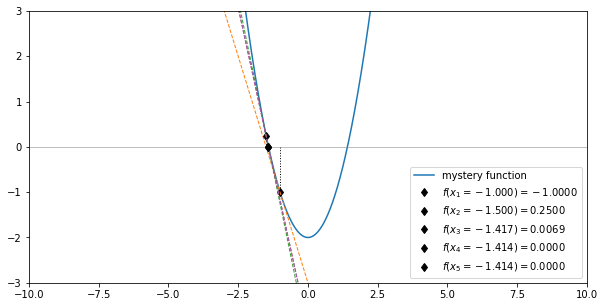

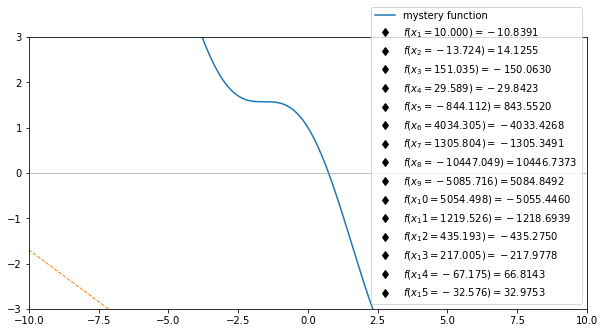

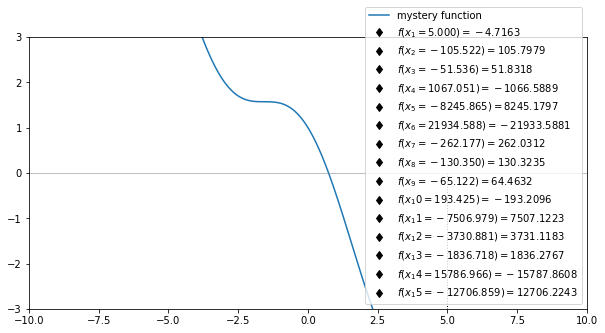

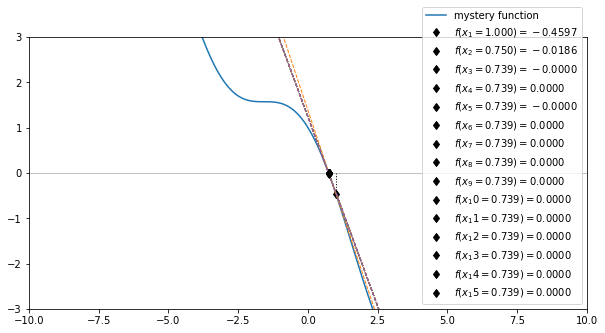

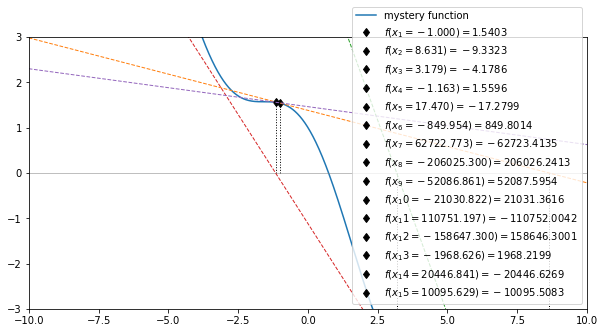

In [331]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f0,-1,5)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f1,10,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f1,5,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f1,1,15)
fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(f1,-1,15)

* Changing the initial guess can make it easier or harder to find the root. This is the starting point and from there we approach the target value. For some initial starting values, the algorithm will take many iterations to find the root.  For example with f1, if our initial guess is far away from the root, say 10, the algorithm won't be able to find the root within 15 iterations. Although the values seem to be approaching the root. For initial guess -1, the algorithm seems to be moving further and further away from the root. 

* The iterations can break down if the derivative has a zero derivative at the root or if the function is not continously differentiable in the interval around the root. If you pick a starting point very far off from the root, the iterations may never find the root. 

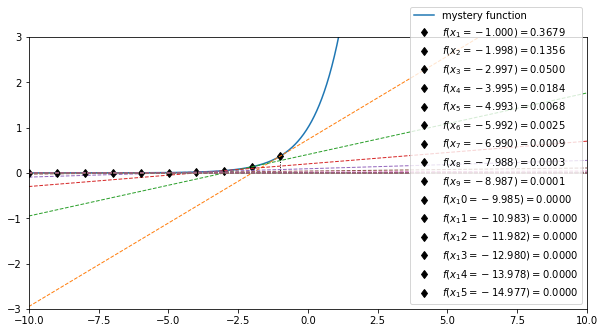

Unable to converge. Slope is 0.


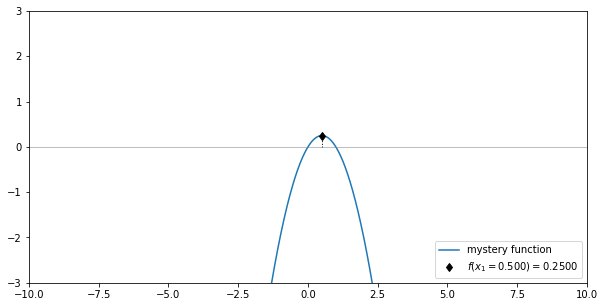

In [355]:
def failfunction(x):
    return np.exp(x), np.exp(x)

fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(failfunction,-1,15)

def failfunction2(x):
    return x-x*x, 1-2*x

fig, ax = plt.subplots(1,1,figsize=(10, 5))
runNewton(failfunction2,0.5,15)

* The bisection method gets closer and closer to the root the more iterations it completes. For this algorithm, if your initial guess is not good, it is possible the algorithm might not converge. For example with the exponential function, there is never a root, but the function appears as if it is converging. This is because we are not seeing all the digits and the number is being truncated. For x-x^2 with starting point 1/2, since the slope is initially 0 the algorithm breaks down. 

* The convergence rate with the Newton method is similar for the functions we tested. It took less than 10 iterations for all of them, except f0 that took 11 iterations. It is hard to compare to the bisection method since this method does not report as many significant figures. However, it appears to be more efficient since we are seeing f(x)=0 after 10 or so iterations, while the bisection method took up to 50. 